In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = 'household_power_consumption.txt'
df = pd.read_csv(data_path, delimiter=';', na_values='?')

In [2]:

# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # Set dayfirst=True to handle the date format

# Subset the data from December 2006 to November 2009
start_date = pd.to_datetime('2006-12-01')
end_date = pd.to_datetime('2009-11-30')
df_subset = df.loc[(df['Date'] >= start_date) & (df['Date'] <= end_date)].copy()

# Drop the 'Time' column
df_subset.drop(columns='Time', inplace=True)

# Set the 'Date' column as the index (if not already)
df_subset.set_index('Date', inplace=True)

# Convert 'Voltage' and 'Global_active_power' columns to float type, handling NaN values
df_subset['Voltage'] = pd.to_numeric(df_subset['Voltage'], errors='coerce')
df_subset['Global_active_power'] = pd.to_numeric(df_subset['Global_active_power'], errors='coerce')

# Impute missing values with the column mean
df_subset['Voltage'].fillna(df_subset['Voltage'].mean(), inplace=True)
df_subset['Global_active_power'].fillna(df_subset['Global_active_power'].mean(), inplace=True)

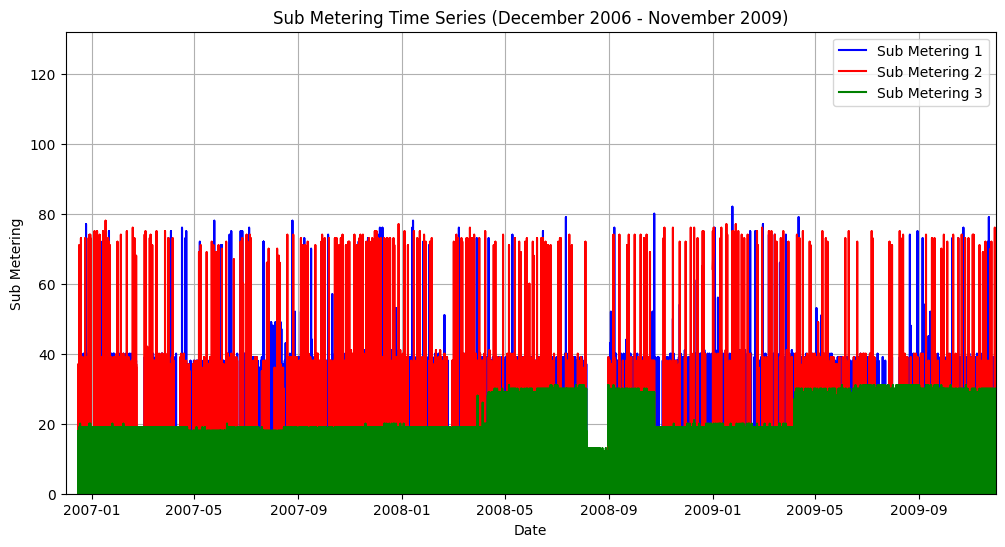

In [3]:
# Time series plot for Sub metering
plt.figure(figsize=(12, 6))
plt.plot(df_subset.index, df_subset['Sub_metering_1'], label='Sub Metering 1', color='blue')
plt.plot(df_subset.index, df_subset['Sub_metering_2'], label='Sub Metering 2', color='red')
plt.plot(df_subset.index, df_subset['Sub_metering_3'], label='Sub Metering 3', color='green')
plt.xlabel('Date')
plt.ylabel('Sub Metering')
plt.title('Sub Metering Time Series (December 2006 - November 2009)')
plt.legend()
plt.grid(True)
plt.xlim(start_date, end_date)  # Limit x-axis to the filtered time period
plt.ylim(0, df_subset[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].max().max() + 50)  # Adjust y-axis limits
plt.show()

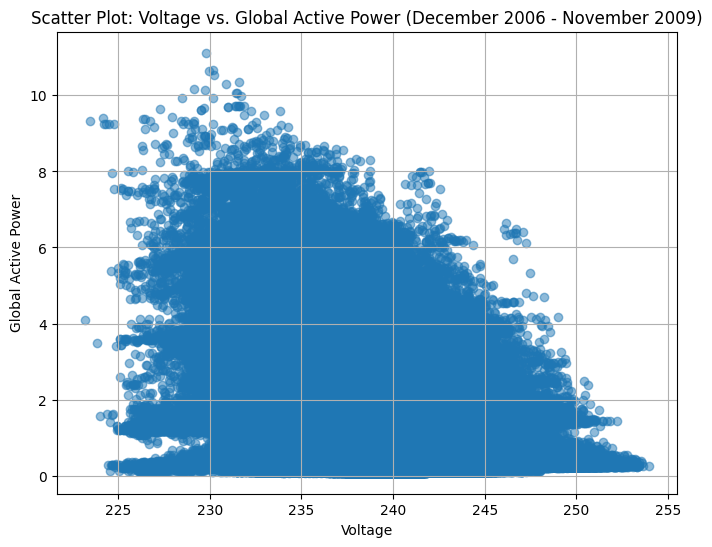

In [4]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_subset['Voltage'], df_subset['Global_active_power'], alpha=0.5)
plt.xlabel('Voltage')
plt.ylabel('Global Active Power')
plt.title('Scatter Plot: Voltage vs. Global Active Power (December 2006 - November 2009)')
plt.grid(True)
plt.show()

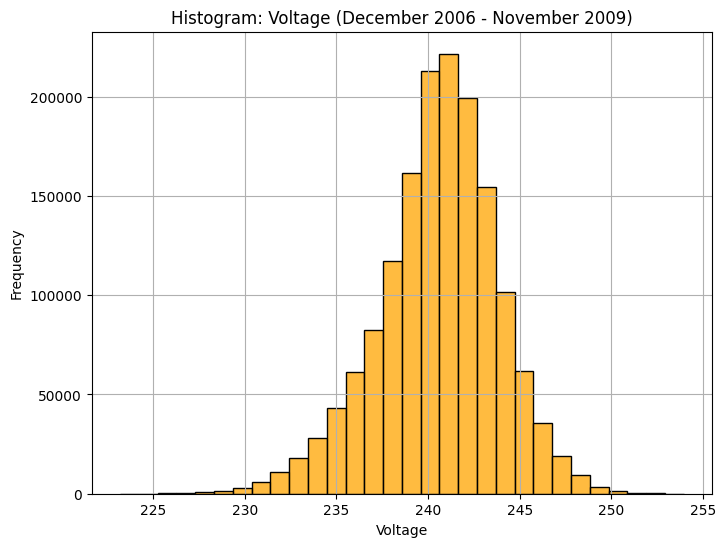

In [5]:

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df_subset['Voltage'], bins=30, color='orange')
plt.xlabel('Voltage')
plt.ylabel('Frequency')
plt.title('Histogram: Voltage (December 2006 - November 2009)')
plt.grid(True)
plt.show()

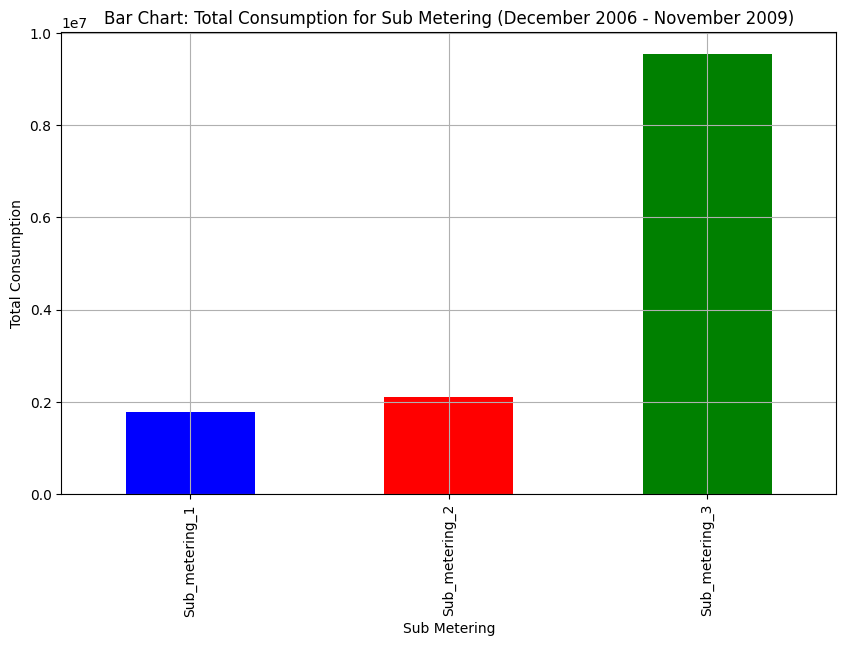

In [6]:
# Bar chart
plt.figure(figsize=(10, 6))
sub_metering_sum = df_subset[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum()
sub_metering_sum.plot(kind='bar', color=['blue', 'red', 'green'])
plt.xlabel('Sub Metering')
plt.ylabel('Total Consumption')
plt.title('Bar Chart: Total Consumption for Sub Metering (December 2006 - November 2009)')
plt.grid(True)
plt.show()

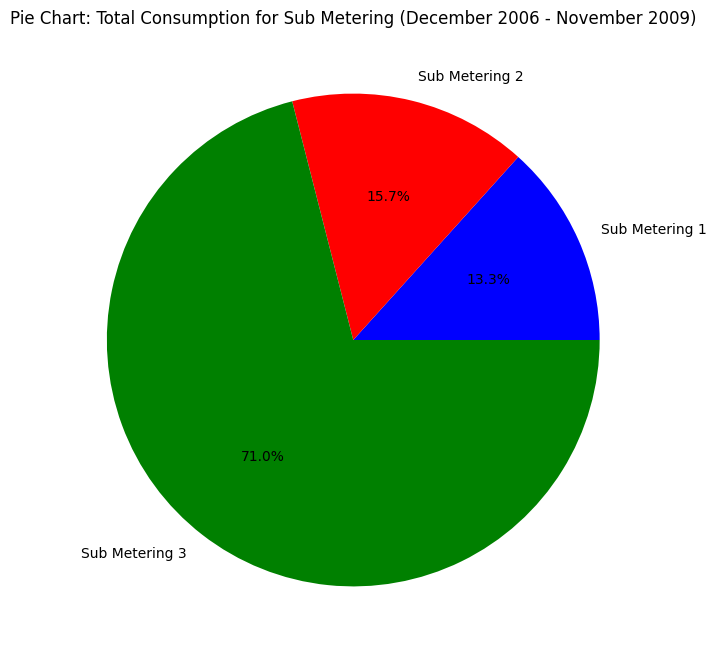

In [7]:
# Pie chart
plt.figure(figsize=(8, 8))
labels = ['Sub Metering 1', 'Sub Metering 2', 'Sub Metering 3']
plt.pie(sub_metering_sum, labels=labels, colors=['blue', 'red', 'green'], autopct='%1.1f%%')
plt.title('Pie Chart: Total Consumption for Sub Metering (December 2006 - November 2009)')
plt.show()

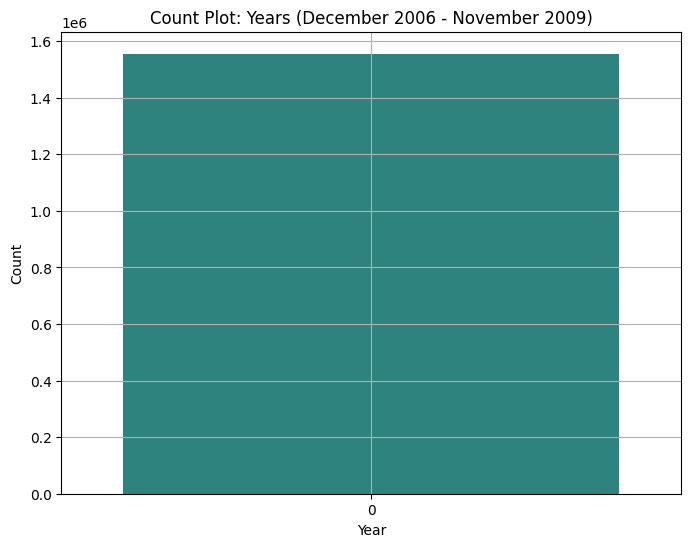

In [8]:
# Count plot
plt.figure(figsize=(8, 6))
sns.countplot(df_subset.index.year, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count Plot: Years (December 2006 - November 2009)')
plt.grid(True)
plt.show()

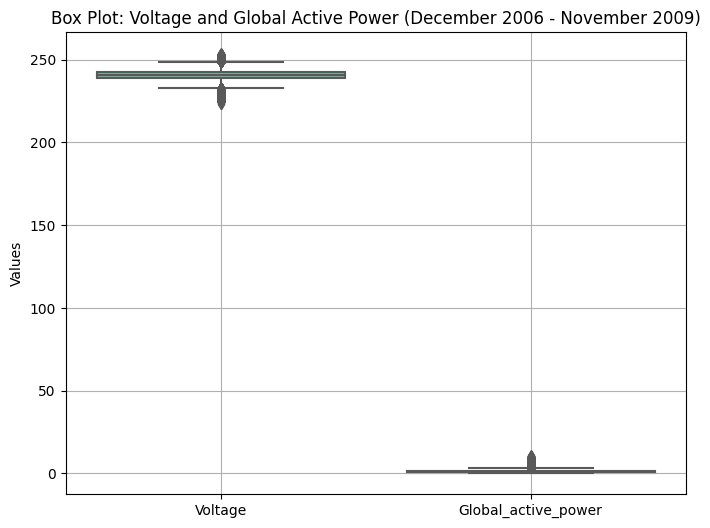

In [9]:
# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_subset[['Voltage', 'Global_active_power']], palette='Set2')
plt.ylabel('Values')
plt.title('Box Plot: Voltage and Global Active Power (December 2006 - November 2009)')
plt.grid(True)
plt.show()

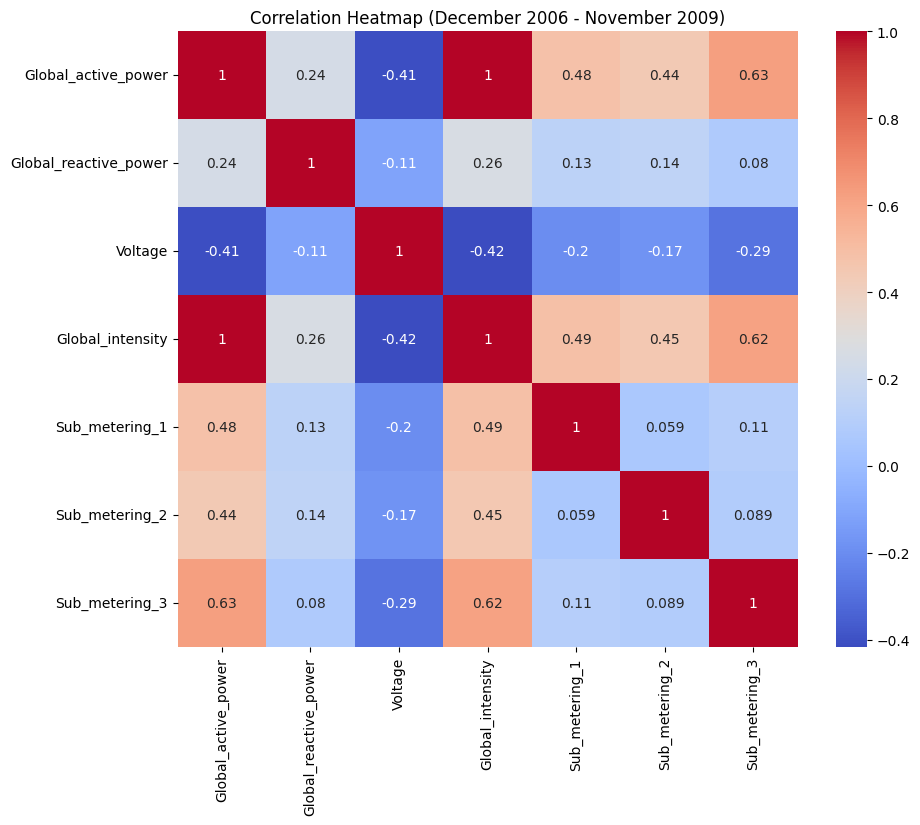

In [10]:
# Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df_subset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (December 2006 - November 2009)')
plt.show()

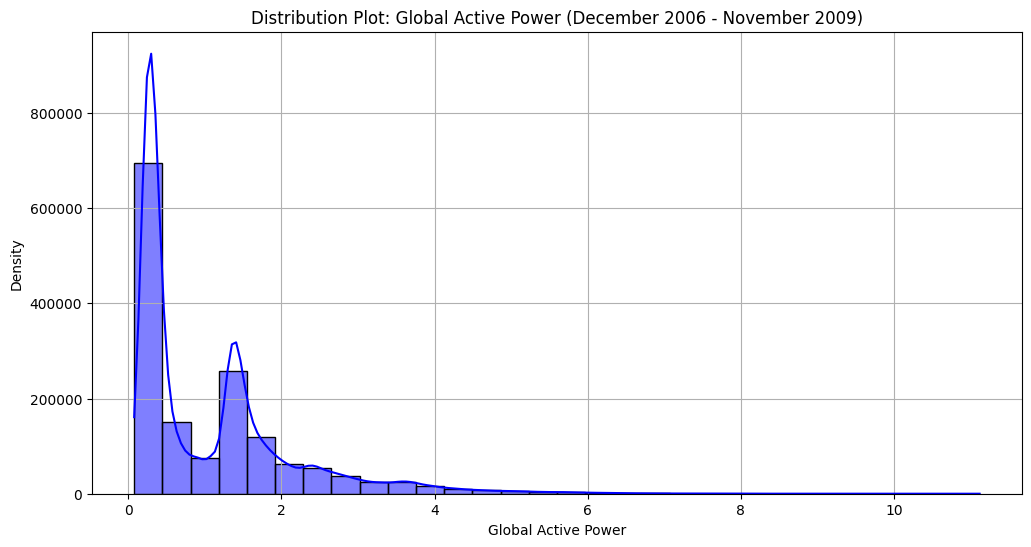

In [11]:
# Distribution plot for Global_active_power
plt.figure(figsize=(12, 6))
sns.histplot(df_subset['Global_active_power'].dropna(), kde=True, bins=30, color='blue')
plt.xlabel('Global Active Power')
plt.ylabel('Density')
plt.title('Distribution Plot: Global Active Power (December 2006 - November 2009)')
plt.grid(True)
plt.show()

<Figure size 900x800 with 0 Axes>

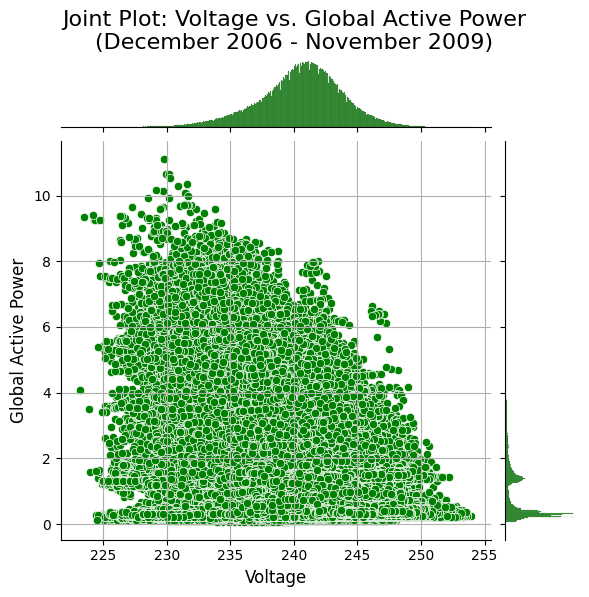

In [12]:

# Joint plot for Voltage and Global_active_power
plt.figure(figsize=(9, 8))
g = sns.jointplot(x='Voltage', y='Global_active_power', data=df_subset.dropna(), kind='scatter', color='green')
g.set_axis_labels('Voltage', 'Global Active Power', fontsize=12)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Joint Plot: Voltage vs. Global Active Power\n(December 2006 - November 2009)', fontsize=16)
plt.grid(True)
plt.show()